In [1]:
#eccentricity.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 1 August 2023.
#compare evolutions

In [2]:
#restore output
dirs = ['yes/', 'no/']
labels = ['self-gravitating', 'non-gravitating']
from helper_fns import *
from libration import *
everything = []
for dir in dirs:
    inputs_file = dir + 'inputs.py'
    execfile(inputs_file)
    output_folder = dir + output_folder
    r, t, vr, vt, times, lambda0 = restore_output(output_folder)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    viscous_timescale = (radial_width**2)/(12*shear_viscosity)
    print 'output_folder = ', output_folder
    print 'shear_viscosity = ', shear_viscosity
    print 'r.shape = ', r.shape
    print 'viscous_timescale = ', viscous_timescale
    times_viscous = times/viscous_timescale
    a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = \
        orbit_deltas(times, r, t, vr, vt, a, e, wt, J2, Rp)
    H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
    everything += [(r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime)]

output_folder =  yes/output
shear_viscosity =  1e-13
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.33333333
output_folder =  no/output
shear_viscosity =  1e-13
r.shape =  (1001, 2, 241)
viscous_timescale =  8333.33333333


In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np
import pandas as pd

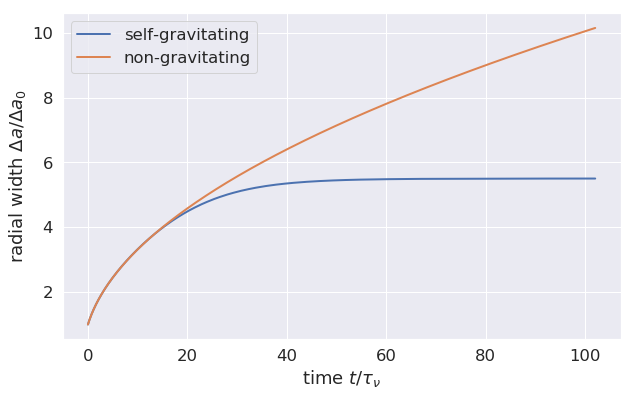

In [4]:
#plot delta_a versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    x = times_viscous
    y = da/da[0]
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()
plt.savefig('figs/self_gravity_da.pdf', bbox_inches='tight')

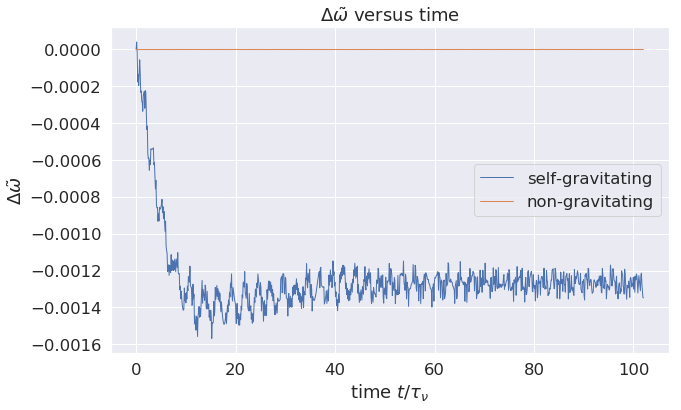

In [5]:
#plot delta_wt versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    x = times_viscous
    y = dwt
    p = ax.plot(x, y, linestyle='-', linewidth=1, label=labels[idx])
p = ax.set_title(r'$\Delta\tilde{\omega}$ versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$')
p = plt.legend(loc='center right')

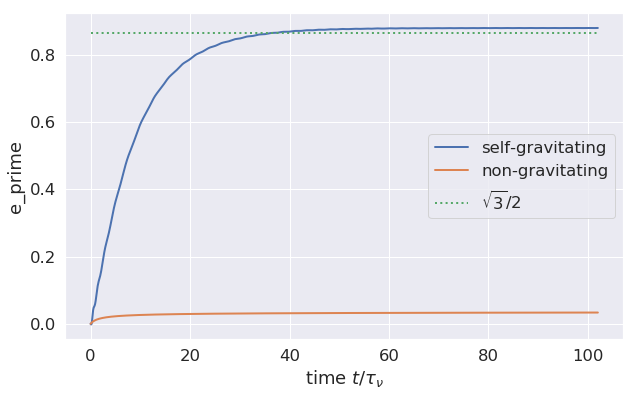

In [6]:
#plot e_prime versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    x = times_viscous
    y = e_prime
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_ylabel('e_prime')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()

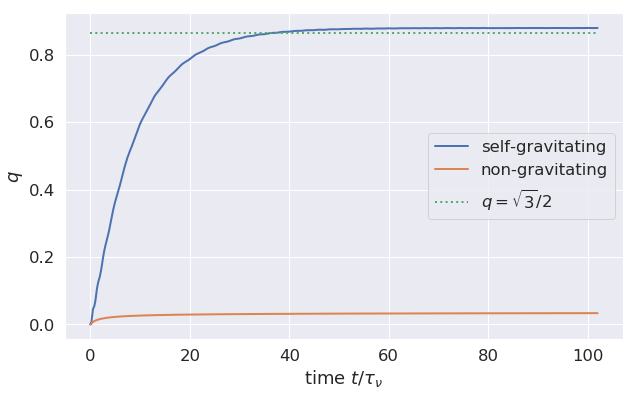

In [7]:
#plot q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
for idx, dir in enumerate(dirs):
    r, t, vr, vt, times, lambda0, a, e, wt, M, times_viscous, da, dwt, q, e_prime, wt_prime = everything[idx]
    x = times_viscous
    y = q
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=labels[idx])
y = x*0 + np.sqrt(3.0)/2.0
p = ax.plot(x, y, linestyle='dotted', linewidth=2, label=r"$q=\sqrt{3}/2$")
p = ax.set_ylabel(r'$q$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = plt.legend()
plt.savefig('figs/self_gravity_q.pdf', bbox_inches='tight')